In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import math
url = 'https://raw.githubusercontent.com/onealbr/phys421/master/JupyterNotebooks/ODB/Mazda_CX5_2016_08122022.csv?raw=true'
data = pd.read_csv(url,delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18498 entries, 0 to 18497
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SECONDS     18498 non-null  float64
 1   PID         18498 non-null  object 
 2   VALUE       18498 non-null  float64
 3   UNITS       15099 non-null  object 
 4   LATITUDE    18498 non-null  float64
 5   LONGTITUDE  18498 non-null  float64
 6   Unnamed: 6  0 non-null      float64
dtypes: float64(5), object(2)
memory usage: 1011.7+ KB


In [4]:
names = ('Altitude_(GPS)', 'Average_fuel_consumption_(total)', 'Average_speed', 'Average_speed_(GPS)', 'Barometric_pressure', 'Calculated_boost', 'Calculated_engine_load_value', 'Calculated_instant_fuel_rate', 'Catalyst_temperature_Bank_1_Sensor_1', 'Commanded_throttle_actuator', 'Distance_travelled', 'Distance_travelled_(total)', 'Engine_coolant_temperature', 'Engine_RPM', 'Fuel_economizer_(based_on_fuel_system_status_and_throttle_position)', 'Fuel_rail_pressure_(absolute)', 'Fuel_used', 'Fuel_used_price', 'Fuel_used_price_(total)', 'Fuel_used_(total)', 'Gear_(AT)', 'Instant_engine_power_(based_on_fuel_consumption)', 'Intake_air_temperature', 'Intake_manifold_absolute_pressure', 'Intake_Shutter_Valve_Angle', 'Long_term_fuel_%_trim_-_Bank_1', 'MAF_air_flow_rate', 'OBD_Module_Voltage', 'Oxygen_sensor_1_Wide_Range_Current_(mA)', 'Oxygen_sensor_1_Wide_Range_Equivalence_ratio', 'Oxygen_sensor_2_Bank_1_Short_term_fuel_trim', 'Oxygen_sensor_2_Bank_1_Voltage', 'PID', 'Power_from_MAF', 'Short_term_fuel_%_trim_-_Bank_1', 'Short_term_secondary_oxygen_sensor_trim_Bank_1', 'Speed_(GPS)', 'Throttle_position', 'Timing_advance', 'Transmission_Fluid_Temperature', 'Vehicle_acceleration', 'Vehicle_speed')
names2 = []
for n in range(0,len(names)):
  a = names[n].replace('_',' ')
  names2.append(a)

for i in range(0,42):
  print(names2[i])

Altitude (GPS)
Average fuel consumption (total)
Average speed
Average speed (GPS)
Barometric pressure
Calculated boost
Calculated engine load value
Calculated instant fuel rate
Catalyst temperature Bank 1 Sensor 1
Commanded throttle actuator
Distance travelled
Distance travelled (total)
Engine coolant temperature
Engine RPM
Fuel economizer (based on fuel system status and throttle position)
Fuel rail pressure (absolute)
Fuel used
Fuel used price
Fuel used price (total)
Fuel used (total)
Gear (AT)
Instant engine power (based on fuel consumption)
Intake air temperature
Intake manifold absolute pressure
Intake Shutter Valve Angle
Long term fuel % trim - Bank 1
MAF air flow rate
OBD Module Voltage
Oxygen sensor 1 Wide Range Current (mA)
Oxygen sensor 1 Wide Range Equivalence ratio
Oxygen sensor 2 Bank 1 Short term fuel trim
Oxygen sensor 2 Bank 1 Voltage
PID
Power from MAF
Short term fuel % trim - Bank 1
Short term secondary oxygen sensor trim Bank 1
Speed (GPS)
Throttle position
Timing ad

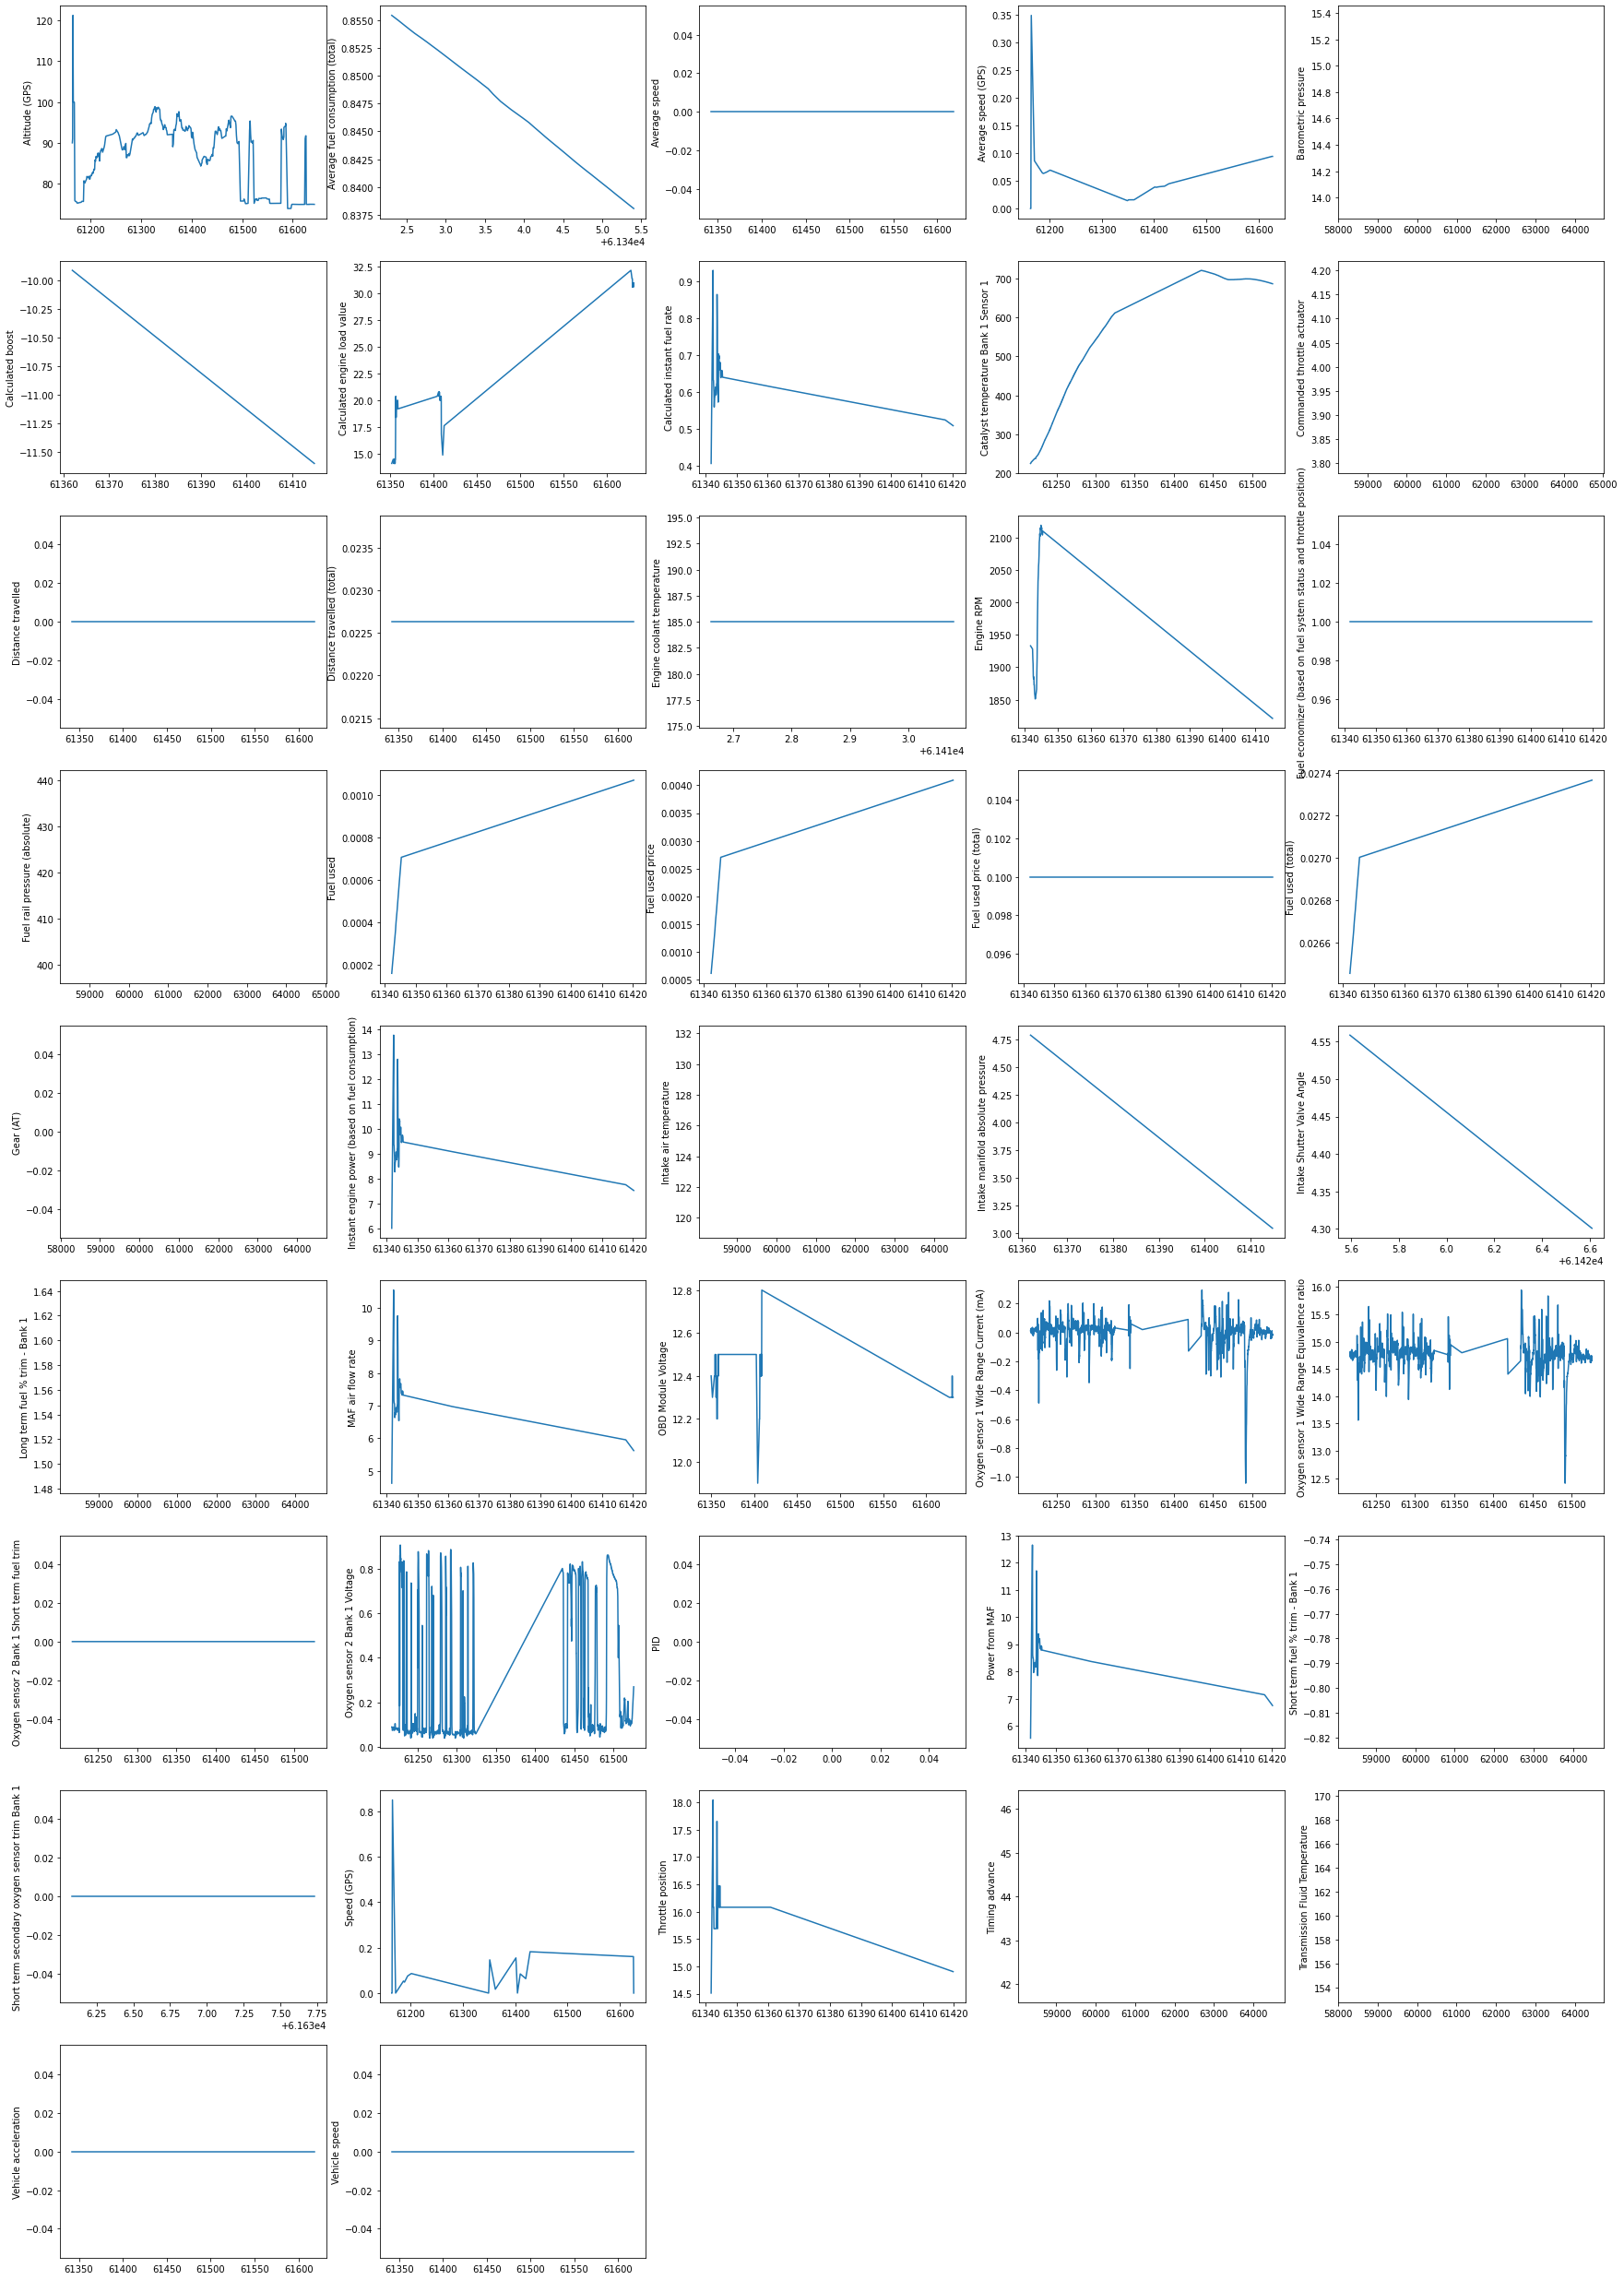

In [38]:
plt.rcParams["figure.figsize"] = (30,50)

datan = []

for i in range(1,43):
  datan = data.loc[data['PID'] == names2[i-1]]
  plt.subplot(10,5,i)
  plt.plot(datan['SECONDS'],datan['VALUE'])
  plt.ylabel(names2[i-1])

# Many of these readings are not very interesting to look at, whether they be zero, or quantities that do no matter (like fuel price, for instance). However, some are of interest. 

# It seems like Calculated Engine Load and Engine RPM are almost completely inversely correlated, which to me seems counterintuitive. It would logically seem that if the engine is cycling more rapidly, then there would be more load on it, but that is apparently not the case!

# Engine Power, Throttle Position, MAF Air Flow Rate, and Instant Fuel Rate are all almost identical. This logically make sense since if you push the throttle more, the engine should work harde, use more fuel, and take in more air. 

# The oxygen sensor 1 has a fairly consistent current except for a huge dip towards the end of the measuring run. If we look at the voltage measurement for oxygen sensor 2, we see similar consistency, but the point at which there was a current dip, the voltage seems to fluctuate less in that interval. I am not sure the significance of this, but it may be useful to know if the car issue is related to the catalytic converter. 

# The Oxygen Sensor 2 Bank 1 Short Term Fuel Trim. This measurement is at zero for the whole observing run. I am not sure if this is normal, but it certainly stands out amongst the other oxygen sensor readings, and as such may be contributing to the catalytic converter issue. 

# One last thing to look at is the Catalyst Temperature Sensor, which reads a steadily increasing temperature. However, as was said in class, the catalytic converter works better at higher temperatures. Looking at the oxygen sensors from before, there does not seem to be any improvements in the performance as the oxygen levels are fairly consistent. This may relate to the underperforming converter as well. 